In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.color import rgb2gray
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

%matplotlib inline


In [2]:
!ls

3_29_2021_dry_run_1.ipynb  3_30_2021_dry_run.ipynb  train.csv
3_29_2021_dry_run.ipynb    3_31_2021_dry_run.ipynb


In [3]:
df_index=pd.read_csv('train.csv')
df_index

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [4]:
df_index.shape

(200840, 5)

<AxesSubplot:>

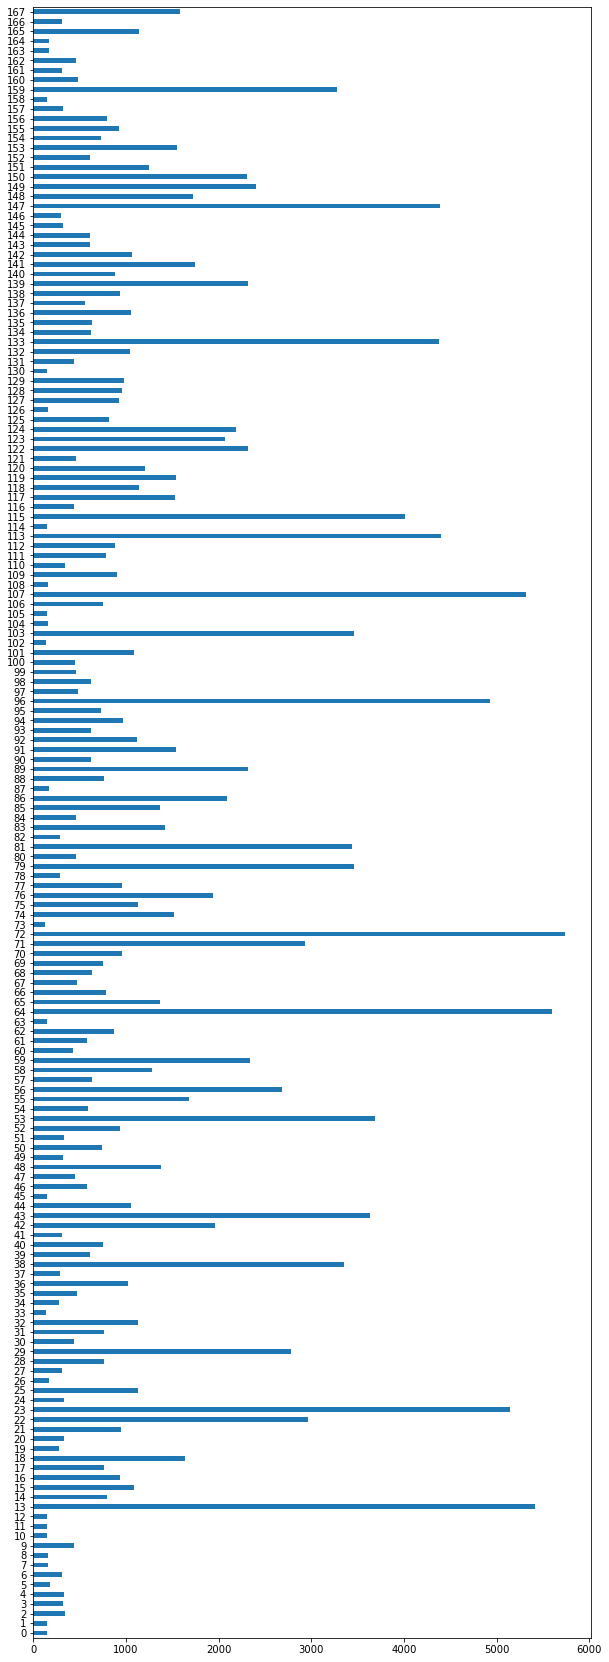

In [5]:
plt.figure(figsize=(10,30))
df_index['grapheme_root'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

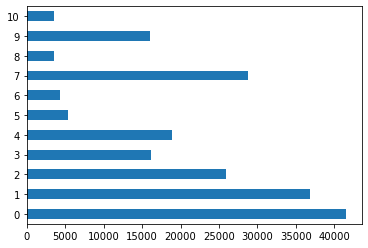

In [6]:
df_index['vowel_diacritic'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

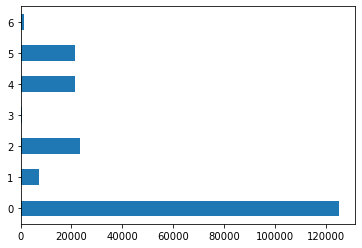

In [7]:
df_index['consonant_diacritic'].value_counts().sort_index().plot.barh()  

In [8]:
df_index['image_id']=df_index['image_id']+'.jpg'

In [9]:
df_index

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0.jpg,15,9,5,ক্ট্রো
1,Train_1.jpg,159,0,0,হ
2,Train_2.jpg,22,3,5,খ্রী
3,Train_3.jpg,53,2,2,র্টি
4,Train_4.jpg,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835.jpg,22,7,2,র্খে
200836,Train_200836.jpg,65,9,0,ত্তো
200837,Train_200837.jpg,2,1,4,অ্যা
200838,Train_200838.jpg,152,9,0,স্নো


In [10]:
df_index['consonant_diacritic'].value_counts() 
#7 values , # 7 columns one hot coding, output = 7 colums and softmax

0    125278
2     23465
5     21397
4     21270
1      7424
6      1387
3       619
Name: consonant_diacritic, dtype: int64

In [11]:
df_index.dtypes

image_id               object
grapheme_root           int64
vowel_diacritic         int64
consonant_diacritic     int64
grapheme               object
dtype: object

In [12]:
!pwd

/home/beth/Galvanize/capstone/capstone_2/src


In [13]:
df_index_1 = df_index.iloc[:44597,:]

In [14]:
df_index_1

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0.jpg,15,9,5,ক্ট্রো
1,Train_1.jpg,159,0,0,হ
2,Train_2.jpg,22,3,5,খ্রী
3,Train_3.jpg,53,2,2,র্টি
4,Train_4.jpg,71,9,5,থ্রো
...,...,...,...,...,...
44592,Train_44592.jpg,78,1,0,দ্মা
44593,Train_44593.jpg,86,2,0,ন্তি
44594,Train_44594.jpg,140,0,0,ষ্ক
44595,Train_44595.jpg,18,9,0,ক্ষো


<AxesSubplot:>

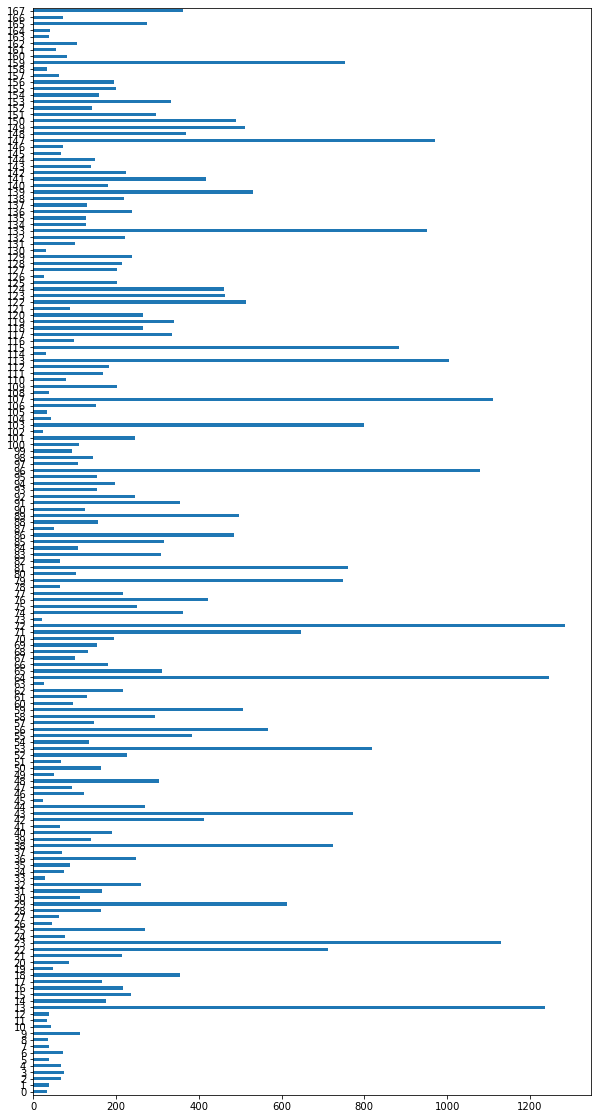

In [15]:
plt.figure(figsize=(10,20))
df_index_1['grapheme_root'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

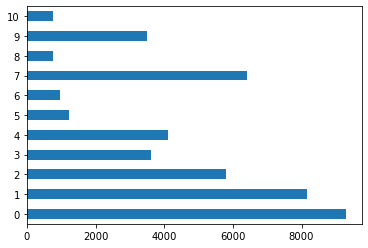

In [16]:
df_index_1['vowel_diacritic'].value_counts().sort_index().plot.barh()  

<AxesSubplot:>

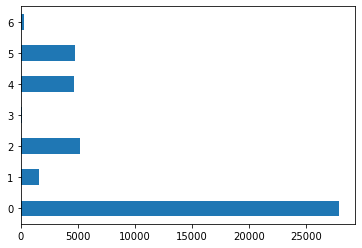

In [17]:
df_index_1['consonant_diacritic'].value_counts().sort_index().plot.barh()  

In [18]:
print(len(df_index_1['grapheme_root'].value_counts()))
df_index_1['grapheme_root'].value_counts()

168


72     1284
64     1247
13     1236
23     1129
107    1110
       ... 
63       27
126      26
45       24
102      24
73       22
Name: grapheme_root, Length: 168, dtype: int64

In [19]:
print(len(df_index_1['vowel_diacritic'].value_counts()))
df_index_1['vowel_diacritic'].value_counts()

11


0     9290
1     8159
7     6414
2     5813
4     4109
3     3613
9     3494
5     1220
6      951
8      769
10     765
Name: vowel_diacritic, dtype: int64

In [20]:
print(len(df_index_1['consonant_diacritic'].value_counts()))
df_index_1['consonant_diacritic'].value_counts() 

7


0    27933
2     5168
5     4784
4     4639
1     1641
6      293
3      139
Name: consonant_diacritic, dtype: int64

In [30]:
!ls


3_29_2021_dry_run_1.ipynb  3_30_2021_dry_run.ipynb  train.csv
3_29_2021_dry_run.ipynb    3_31_2021_dry_run.ipynb


In [21]:
df_shuffle = df_index_1.sample(frac=1) #shuffle

In [22]:
train = df_shuffle.iloc[:int(0.8*len(df_index_1)),:]
test = df_shuffle.iloc[int(0.8*len(df_index_1)):,:]

In [23]:
train.iloc[30415,:][3]

0

In [24]:
train.sample()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
25363,Train_25363.jpg,13,2,5,ক্রি


In [37]:
from PIL import Image 

def mygenerator(dataframe): # X = image, y = target
    while True:
        sample = dataframe.sample()
        TRAIN_DIR = '/home/beth/Galvanize/capstone/capstone_2/data/train/'
        image_name = TRAIN_DIR + sample['image_id'].values[0]
        image=Image.open(image_name)
        y=np.zeros(7)
        y[sample["consonant_diacritic"].values[0]]=1   
        X = np.array(image).astype(np.int32)
        y = y.astype(np.int32).reshape(1,7) 
#         X = np.array([X,X,X]).reshape(1,137,236,3)
        X = X.reshape(1,137,236,1)
        yield X,y
# infinite numbers of X and y    

In [38]:
X,y = next(mygenerator(train)) # randomly pick a row 

In [39]:
X.shape

(1, 137, 236, 1)

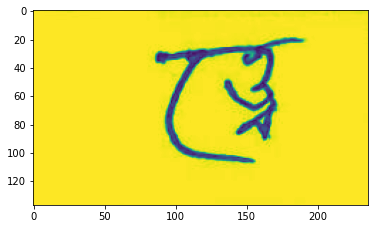

In [40]:
plt.imshow(X[0,:,:,0])

In [41]:
y

array([[1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [42]:
# wanna try ResNet and AlexNet 3-31-2021

In [45]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 7, activation="relu", padding="valid", input_shape=(137,236,1)),#input shape: [rows, columns, channels]
    keras.layers.Conv2D(32, 3, activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(2),

    keras.layers.Conv2D(64, 3, activation="relu", padding="valid"),
    keras.layers.Conv2D(64, 3, activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(128, 3, activation="relu", padding="valid"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),     # < --------------------------
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),     # < --------------------------
    keras.layers.Dense(7, activation="softmax")
])

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy', keras.metrics.Recall()])

# Details/Retrospectives:

# - did not Norm layers (not common anymore)
# - no data augmentation
# - dropout 0.3  <--------------------------
# - batch size 32 <--------------------------
# - no SGD Momentum 
# - no Learning rate, reduced by 10 manually when val accuracy plateaus
# - no L2 weight decay 5
# - no 7 CNN ensemble: 


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 131, 230, 32)      1600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 129, 228, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 114, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 112, 64)       18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 110, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 55, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 53, 128)       7

In [47]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=100),
    keras.callbacks.TensorBoard(log_dir='./logs')]
#keras.callbacks.ModelCheckpoint(filepath='./checkpoint/model.{epoch:02d}-{val_loss:.2f}.h5')

history = model.fit(mygenerator(train),
                    epochs=75,
                    steps_per_epoch=64, #<------------
                    validation_data=mygenerator(test),
                    validation_steps=30, 
                    callbacks=my_callbacks)                 


Epoch 1/75
64/64 [==============================] - 7s 93ms/step - loss: 7.7453 - accuracy: 0.3660 - recall: 0.2595 - val_loss: 1.5531 - val_accuracy: 0.4667 - val_recall: 0.0000e+00
Epoch 2/75
64/64 [==============================] - 5s 86ms/step - loss: 1.0077 - accuracy: 0.8042 - recall: 0.4865 - val_loss: 1.4981 - val_accuracy: 0.5667 - val_recall: 0.4000
Epoch 3/75
64/64 [==============================] - 6s 87ms/step - loss: 1.2446 - accuracy: 0.6910 - recall: 0.5487 - val_loss: 1.1905 - val_accuracy: 0.6333 - val_recall: 0.6333
Epoch 4/75
64/64 [==============================] - 5s 85ms/step - loss: 1.3527 - accuracy: 0.5613 - recall: 0.2638 - val_loss: 1.4253 - val_accuracy: 0.5333 - val_recall: 0.5333
Epoch 5/75
64/64 [==============================] - 5s 85ms/step - loss: 1.6040 - accuracy: 0.5555 - recall: 0.2756 - val_loss: 1.1000 - val_accuracy: 0.7000 - val_recall: 0.7000
Epoch 6/75
64/64 [==============================] - 5s 85ms/step - loss: 1.2514 - accuracy: 0.6790 - 

64/64 [==============================] - 6s 99ms/step - loss: 1.0832 - accuracy: 0.6667 - recall: 0.5294 - val_loss: 1.2941 - val_accuracy: 0.6000 - val_recall: 0.6000
Epoch 47/75
64/64 [==============================] - 6s 99ms/step - loss: 1.1443 - accuracy: 0.6490 - recall: 0.5937 - val_loss: 1.1305 - val_accuracy: 0.6333 - val_recall: 0.6333
Epoch 48/75
64/64 [==============================] - 6s 98ms/step - loss: 1.0591 - accuracy: 0.6989 - recall: 0.6625 - val_loss: 1.0213 - val_accuracy: 0.6667 - val_recall: 0.6667
Epoch 49/75
64/64 [==============================] - 7s 102ms/step - loss: 1.0877 - accuracy: 0.6631 - recall: 0.6020 - val_loss: 1.2271 - val_accuracy: 0.6000 - val_recall: 0.6000
Epoch 50/75
64/64 [==============================] - 6s 97ms/step - loss: 0.9247 - accuracy: 0.8249 - recall: 0.7257 - val_loss: 1.3913 - val_accuracy: 0.5000 - val_recall: 0.0000e+00
Epoch 51/75
64/64 [==============================] - 6s 99ms/step - loss: 0.8409 - accuracy: 0.8485 - recal

In [48]:
score = model.evaluate(mygenerator(test), steps=200,verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])  # this is the one we care about

Test score: 1.1329227685928345
Test accuracy: 0.6499999761581421


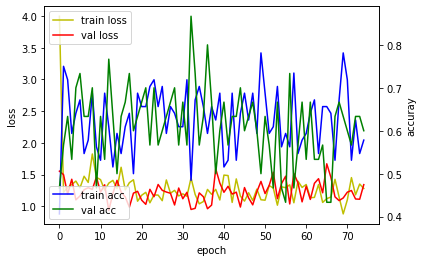

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


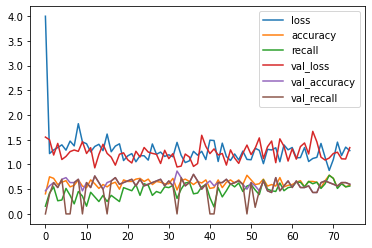

In [50]:
[plt.plot(history.history[i], label=i) for i in history.history.keys()]
plt.legend();

In [148]:
# confusion matrix
# from sklearn.metrics import confusion_matrix

# y_pred = model.predict(mygenerator(test),steps=200) # probability
# y_pred = np.argmax(y_pred, axis=1) # index of highest prob 
# y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

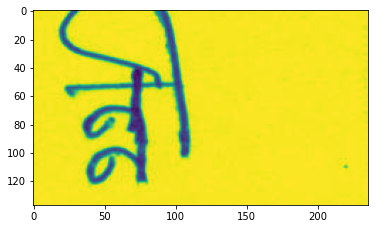

In [51]:
x,y= next(mygenerator(test))
x.shape
y.shape
plt.imshow(x[0,:,:,0])

In [53]:
prediction = [] 
actual = []
for x,y in mygenerator(test):
#     plt.imshow(x[0,:,:,0])
    actual.append(y.argmax())
    prediction.append(model.predict(x).argmax())
    if len(actual)>2000:
        break     

In [35]:
# actual

In [36]:
# prediction

In [54]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
multiclass=confusion_matrix(actual, prediction)
print(multiclass)

Confusion Matrix
[[1236    0    0    0    0    0    0]
 [  78    0    0    0    0    0    0]
 [ 253    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0]
 [ 204    0    0    0    0    0    0]
 [ 211    0    0    0    0    0    0]
 [  15    0    0    0    0    0    0]]


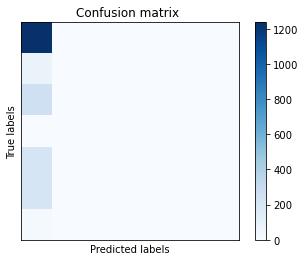

In [64]:
cm = confusion_matrix(actual, prediction)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()


In [143]:
# TRAIN_DIR = '/home/beth/Galvanize/capstone/capstone_2/data/train/train'
# # VALIDATION_DIR = '/home/beth/Galvanize/capstone/capstone_2/data/test'

# datagen = ImageDataGenerator(validation_split=0.3, rescale=1./255)
# batch_size = 32
# train_generator = datagen.flow_from_dataframe(dataframe=df_index_1,
#                                               directory=TRAIN_DIR,
#                                               x_col="image_id",
#                                               y_col="consonant_diacritic",
#                                               weight_col=None,
#                                               target_size=(137, 236),
#                                               color_mode="grayscale",
#                                               classes=None,
#                                               class_mode="raw",
#                                               batch_size=batch_size,
#                                               shuffle=True,
#                                               subset=None,
#                                               interpolation="nearest",
#                                               validate_filenames=True)

#"raw": numpy array of values in y_col column(s), - "sparse": 1D numpy array of integer labels, 
# validation_generator = ImageDataGenerator.flow_from_dataframe(dataframe,
#                                                          directory=TRAIN_DIR,
#                                                          x_col="filename",
#                                                          y_col="class",
#                                                          weight_col=None,
#                                                          target_size=(256, 256),
#                                                          color_mode="rgb",
#                                                          classes=None,
#                                                          class_mode="categorical",
#                                                          batch_size=batch_size,
#                                                          shuffle=False,
#                                                          seed=None,
#                                                          save_to_dir=None,
#                                                          save_prefix="",
#                                                          save_format="png",
#                                                          subset=None,
#                                                          interpolation="nearest",
#                                                          validate_filenames=True)

# train_generator = datagen.flow_from_directory(
#     TRAIN_DIR, 
#     subset='training'
# )

# val_generator = datagen.flow_from_directory(
#     TRAIN_DIR,
#     subset='validation'
# )
# https://ibrahimgoke.medium.com/split-train-data-into-training-and-validation-when-using-imagedatagenerator-in-keras-ffdc88bbf6f3

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)


Found 44597 validated image filenames.


In [ ]:
# validation_generator = test_datagen.flow_from_directory(
#         '../data/validation',
#         target_size=(150, 150),
#         batch_size=batch_size,
#         class_mode='binary')

# cat_dog_model.fit_generator(
#     train_generator,
#     steps_per_epoch=180 // batch_size,
#     epochs=50,
#     validation_data=validation_generator,
#     validation_steps=20 // batch_size)

# score = cat_dog_model.evaluate(validation_generator, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])  # this is the one we care about

In [ ]:
# # important inputs to the model: don't changes the ones marked KEEP in the functions above
# batch_size = 5000  # number of training samples used at a time to update the weights
# nb_epoch = 2       # number of passes through the entire train dataset before weights "final"
# nb_filters = 12    # number of convolutional filters to use
# pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
# kernel_size = (4, 4)  # convolutional kernel size, slides over image to learn features
# dropout = 0.1
# activation='tanh'
# optimizer='adadelta'

# model = Sequential()  # model is a linear stack of layers (don't change)

#     # note: the convolutional layers and dense layers require an activation function
#     # see https://keras.io/activations/
#     # and https://en.wikipedia.org/wiki/Activation_function
#     # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

#     model.add(Conv2D(nb_filters,
#                      (kernel_size[0], kernel_size[1]),
#                      padding='valid',
#                      input_shape=input_shape))  # first conv. layer  KEEP
#     model.add(Activation(activation))  # Activation specification necessary for Conv2D and Dense layers

#     model.add(Conv2D(nb_filters,
#                      (kernel_size[0], kernel_size[1]),
#                      padding='valid'))  # 2nd conv. layer KEEP
#     model.add(Activation(activation))

#     model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
#     model.add(Dropout(dropout))  # zeros out some fraction of inputs, helps prevent overfitting

#     model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
#     print('Model flattened out to ', model.output_shape)

#     # now start a typical neural network
#     model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
#     model.add(Activation(activation))

#     model.add(Dropout(dropout))  # zeros out some fraction of inputs, helps prevent overfitting

#     model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
#     model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

#     # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
#     # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
#     # and KEEP metrics at 'accuracy'
#     # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
#     model.compile(loss='categorical_crossentropy',
#                   optimizer=optimizer,
#                   metrics=['accuracy'],
#                  learning)
#     return model